In [ ]:
import zipfile
import os
from google.colab import drive

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file = '/content/drive/My Drive/archive.zip'

In [ ]:
z = zipfile.ZipFile(zip_file, 'r')

In [ ]:
z.extractall()

In [ ]:
print(os.listdir())

['.config', 'EfficientNetB0-515-(224 X 224)- 98.95.h5', 'train', 'drive', 'birds.csv', 'test', 'valid', 'sample_data']


In [ ]:
df = pd.read_csv('birds.csv')

In [ ]:
df.columns = ['class_id', 'filepaths', 'labels', 'data_set', 'scientific_name']

In [ ]:
train = './train'
validation = './valid'
test = './test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True
)  # Initialize train generator 
valid_datagen = ImageDataGenerator(rescale = 1./255)   # Initialize validation generator 
test_datagen = ImageDataGenerator(rescale = 1./255)   # Initialize validation generator 

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    validation, target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 82724 images belonging to 515 classes.
Found 2575 images belonging to 515 classes.
Found 2575 images belonging to 515 classes.


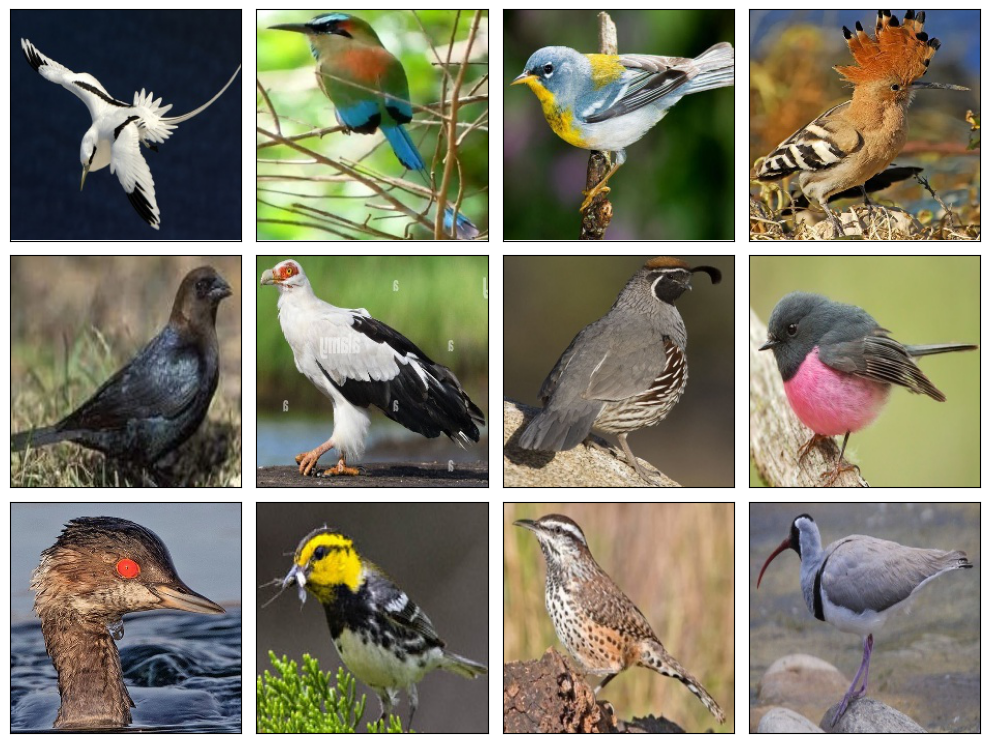

In [ ]:
features, target = next(train_generator)

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [ ]:
optimizer = Adam(learning_rate=0.0001)
backbone = ResNet50(
    input_shape= (224,224,3),
    weights='imagenet', 
    include_top=False
)
model = Sequential()
model.add(backbone)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=515, activation='softmax'))

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy', 
    metrics=['acc']
) 

model.fit(
    train_generator,  
    validation_data=validation_generator,
    batch_size=None, epochs=10,
    steps_per_epoch=None,
    validation_steps=None,
    verbose=2, shuffle=True
)



94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
2586/2586 - 935s - loss: 1.2062 - acc: 0.7559 - val_loss: 0.2829 - val_acc: 0.9243 - 935s/epoch - 362ms/step
Epoch 2/10
2586/2586 - 880s - loss: 0.2938 - acc: 0.9260 - val_loss: 0.3275 - val_acc: 0.9083 - 880s/epoch - 340ms/step
Epoch 3/10
2586/2586 - 881s - loss: 0.1906 - acc: 0.9498 - val_loss: 0.2453 - val_acc: 0.9320 - 881s/epoch - 341ms/step
Epoch 4/10
2586/2586 - 881s - loss: 0.1340 - acc: 0.9637 - val_loss: 0.1965 - val_acc: 0.9410 - 881s/epoch - 341ms/step
Epoch 5/10
2586/2586 - 882s - loss: 0.1053 - acc: 0.9708 - val_loss: 0.1786 - val_acc: 0.9456 - 882s/epoch - 341ms/step
Epoch 6/10
2586/2586 - 881s - loss: 0.0872 - acc: 0.9751 - val_loss: 0.2335 - val_acc: 0.9402 - 881s/epoch - 341ms/step
Epoch 7/10
2586/2586 - 881s - loss: 0.0720 - acc: 0.9796 - val_loss: 0.2012 - val_acc: 0.9406 - 881s/epoch - 341ms/step
Epoch 8/10
2586/2586 - 881s - loss: 0.0625 - acc: 0.9821 - val_loss: 0.1857 - val_acc: 0.9522 -

In [ ]:
model.save('./my_birds')

In [ ]:
!zip -r /content/my_birds.zip /content/my_birds

  adding: content/my_birds/ (stored 0%)
  adding: content/my_birds/assets/ (stored 0%)
  adding: content/my_birds/keras_metadata.pb (deflated 96%)
  adding: content/my_birds/variables/ (stored 0%)
  adding: content/my_birds/variables/variables.index (deflated 79%)
  adding: content/my_birds/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/my_birds/fingerprint.pb (stored 0%)
  adding: content/my_birds/saved_model.pb (deflated 92%)


In [ ]:
from google.colab import files

In [ ]:
files.download('/content/my_birds.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>